# **K-Medoids Algorithm**

K-Medoids is a clustering algorithm resembling the K-Means clustering technique. It falls under the category of unsupervised machine learning. It majorly differs from the K-Means algorithm in terms of the way it selects the clusters’ centres. The former selects the average of a cluster’s points as its centre (which may or may not be one of the data points) while the latter always picks the actual data points from the clusters as their centres (also known as ‘exemplars’ or ‘medoids’). K-Medoids also differs in this respect from the K-Medians algorithm whic,h is the same as K-means, except that it chooses the medians (instead of means) of the clusters as centres.

## **Working of the K-Medoids approach**

The steps followed by the K-Medoids algorithm for clustering are as follows:

1. Randomly choose ‘k’ points from the input data (‘k’ is the number of clusters to be formed). The correctness of the choice of k’s value can be assessed using methods such as [silhouette method](https://en.wikipedia.org/wiki/Silhouette_(clustering)).

2. Each data point gets assigned to the cluster to which its nearest medoid belongs.

3. For each data point of cluster i, its distance from all other data points is computed and added. The point of ith cluster for which the computed sum of distances from other points is minimal is assigned as the medoid for that cluster.

4. Steps (2) and (3) are repeated until convergence is reached i.e. the medoids stop moving.

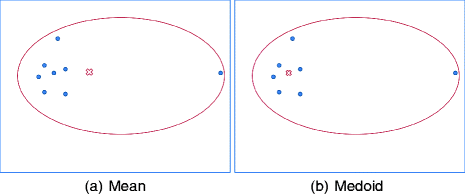

For Detailed Analysis, please refer [Comprehensive Guide to K-Medoids](https://analyticsindiamag.com/comprehensive-guide-to-k-medoids-clustering-algorithm/) post.

## **Practical Implementation**

Here’s a demonstration of implementing K-Medoids algorithm on a dataset containing 8*8 dimensional images of handwritten digits. The task is to divide the data points into 10 clusters (for classes 0-9) using K-Medoids. The dataset used is a copy of the test set of the [original dataset](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits)  available on UCI ML Repository. Step-wise explanation of the code is as follows:

### **Install Library**

Install scikit-learn-extra Python module, an extension of scikit-learn designed for implementing more advanced algorithms that cannot be used by mere inclusion of scikit-learn in the code.

### **Import required libraries and modules.**

In [ ]:
!python -m pip install pip --upgrade --user -q
!python -m pip install numpy pandas seaborn matplotlib scipy sklearn statsmodels scikit-image scikit-learn-extra --user -q

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
#Import the digits’ dataset available in sklearn.datasets package
from sklearn.datasets import load_digits
#Instead of using all 64 attributes of the dataset, we use Principal Component Analysis (PCA)  
#to reduce the dimensions of features set such that most of the useful information is covered.

from sklearn.decomposition import PCA
#"""
#Import module for standardizing the dataset i.e. rescaling the data such that its has mean of 0 and standard deviation of 1
#""
from sklearn.preprocessing import scale 

### **Prepare the input data**

In [ ]:
#Load the digits dataset 
dataset = load_digits()
#Standardize the data
digit_data = scale(dataset.data)

#Compute number of output classes i.e. number of digits for which we have the data (here 10 (0-9))

num_digits = len(np.unique(dataset.target)) 

### **Reduce the dimensions of the data using PCA.**

In [ ]:
red_data = PCA(n_components=2).fit_transform(digit_data)

# PCA constructs new components by linear combinations of original features. 
#‘n_components’ parameter denotes the number of newly formed components to be considered. 
#fit_transform() method fits the PCA models and performs dimensionality reduction on digit_data.  

### **Plot the Decision Boundary**

Plot the decision boundaries for each cluster. Assign a different color to each for differentiation.

In [ ]:
h = 0.02 #step size of the mesh 
#Minimum and maximum x-coordinates
xmin, xmax = red_data[:, 0].min() - 1, red_data[:, 0].max() + 1
#Minimum and maximum y-coordinates
ymin, ymax = red_data[:, 1].min() - 1, red_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h)) 

### **Define Models**

Define an array of K-Medoids variants to be used. We have used  three different distance metrics (Manhattan distance, Euclidean distance and Cosine dissimilarity/distance) for computing the distance of each data point from every other data point while selecting the medoid. Visit this page to know about the distance metrics used in detail.

The parameters we have specified in the KMedoids() method have the following significance:

> * metric – distance metric to be used (default: ‘euclidean’)
> * n_clusters – number of clusters to be formed and hence the number of medoids (one per cluster) (default value: 8)
> * init – ‘heuristic’ method used for medoid initialization

 For each data point, itd distance from all other points is computed and the distances are summed up. N_clusters number of points for which such a sum of 
distances are minimum, are chosen as medoids.

> * max_iter – maximum number of the algorithm’s iterations to be performed when fitting the data

The KMedoids() method of scikit-learn-extra by default used the PAM (Partition Around Medoids) algorithm for finding the medoids.

In [ ]:
models = [
    (
        KMedoids(metric="manhattan", n_clusters=num_digits, init="heuristic", max_iter=2),
        "Manhattan metric",
    ),
    (
        KMedoids(metric="euclidean", n_clusters=num_digits, init="heuristic", max_iter=2),
        "Euclidean metric",
    ),
    (KMedoids(metric="cosine", n_clusters=num_digits, init="heuristic", max_iter=2), "Cosine metric", ),
]

Initialize the number of rows and columns of the plot for plotting subplots of each of the three metrics’ results.

In [ ]:
 #number of rows = integer(ceiling(number of model variants/2))
 num_rows = int(np.ceil(len(models) / 2.0))
 #number of columns
 num_cols = 2 

### **Fit the defined Models**

Fit each of the model variants to the data and plot the resultant clustering.

In [ ]:
plt.figure(figsize=(15,10))
for i, (model, description) in enumerate(models):

  # Obtain labels for each point in mesh. Use last trained model.
  model.fit(red_data)
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.subplot(num_cols, num_rows, i + 1)
  plt.imshow(
      Z,
      interpolation="nearest",
      extent=(xx.min(), xx.max(), yy.min(), yy.max()),
      cmap=plt.cm.Paired,
      aspect="auto",
      origin="lower",
  )

  plt.plot(
      red_data[:, 0], red_data[:, 1], "k.", markersize=2, alpha=0.3
  )
  # Plot the centroids as a white X
  centroids = model.cluster_centers_
  plt.scatter(
      centroids[:, 0],
      centroids[:, 1],
      marker="x",
      s=169,
      linewidths=3,
      color="w",
      zorder=10,
  )
  plt.title(description)
  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)
  plt.xticks(())
  plt.yticks(())

plt.suptitle(
  "K-Medoids algorithm implemented with different metrics\n\n",
  fontsize=20,
)
plt.show()

Related Articles: 

> * [Comprehensive Guide to K-Medoids](https://analyticsindiamag.com/comprehensive-guide-to-k-medoids-clustering-algorithm/)

> * [Clustering Algorithm every Data Science Practitioner should know](https://analyticsindiamag.com/clustering-techniques-every-data-science-beginner-should-swear-by/)

> * [Beginner Guide to K-Means](https://analyticsindiamag.com/beginners-guide-to-k-means-clustering/)

> * [Is K-Means is the best algorithm?](https://analyticsindiamag.com/is-k-means-clustering-really-the-best-unsupervised-learning-algorithm/)